#Using SGV and deep learning models

In [67]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [68]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [69]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [70]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [71]:
# Set features. This will also be used as your x values.
# model uses all  features to asses which ones have greater importance 
X=df.drop("koi_disposition", axis=1)
selected_features=X.columns
selected_features

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [29]:
# Remove Space for `FALSE POSITIVE` category
mask = df["koi_disposition"] == "FALSE POSITIVE"
df.loc[mask, "koi_disposition"] = "False_Positive"
df["koi_disposition"]

0            CONFIRMED
1       False_Positive
2       False_Positive
3            CONFIRMED
4            CONFIRMED
             ...      
6986    False_Positive
6987    False_Positive
6988         CANDIDATE
6989    False_Positive
6990    False_Positive
Name: koi_disposition, Length: 6991, dtype: object

In [30]:
# Use `koi_disposition` for the y values
target=df["koi_disposition"]
target_names= ["CONFIRMED", "False_Positive", "CANDIDATE"]
target_names

['CONFIRMED', 'False_Positive', 'CANDIDATE']

In [31]:
# Create a Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, target, random_state=580580, stratify = target)

X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
977,0,0,0,0,77.634246,0.000060,-0.000060,417.153212,0.000517,-0.000517,...,-172,4.548,0.066,-0.039,0.755,0.054,-0.074,298.92593,43.750370,15.915
5836,1,0,0,0,581.072300,0.017420,-0.017420,371.024900,0.023200,-0.023200,...,-298,2.504,0.033,-0.033,16.891,0.614,-7.582,297.62296,46.753860,12.282
420,0,0,0,0,17.444860,0.000049,-0.000049,141.680200,0.002320,-0.002320,...,-166,4.413,0.120,-0.180,0.966,0.261,-0.141,294.84384,44.077679,15.007
6423,0,0,0,0,5.606820,0.000058,-0.000058,135.844660,0.008980,-0.008980,...,-169,4.553,0.040,-0.160,0.853,0.193,-0.069,294.73962,50.566841,15.289
406,0,0,0,0,17.317117,0.000047,-0.000047,142.360940,0.002200,-0.002200,...,-164,4.753,0.042,-0.024,0.502,0.023,-0.029,299.89722,43.903912,15.759


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [32]:
# Scale the data using the MinMaxScaler and perform some feature selection
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [34]:
# Hyperparameter Tuning¶
# Use GridSearchCV to tune the model's parameters
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [35]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [5, 10, 50, 100],
              'gamma': [0.00001, 0.00005, 0.0001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [36]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters

grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=5, gamma=1e-05 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=5, gamma=1e-05, score=0.863, total=   0.4s
[CV] C=5, gamma=1e-05 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................... C=5, gamma=1e-05, score=0.858, total=   0.4s
[CV] C=5, gamma=1e-05 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .................... C=5, gamma=1e-05, score=0.846, total=   0.4s
[CV] C=5, gamma=1e-05 ................................................
[CV] .................... C=5, gamma=1e-05, score=0.855, total=   0.4s
[CV] C=5, gamma=1e-05 ................................................
[CV] .................... C=5, gamma=1e-05, score=0.875, total=   0.4s
[CV] C=5, gamma=5e-05 ................................................
[CV] .................... C=5, gamma=5e-05, score=0.863, total=   0.4s
[CV] C=5, gamma=5e-05 ................................................
[CV] .................... C=5, gamma=5e-05, score=0.858, total=   0.4s
[CV] C=5, gamma=5e-05 ................................................
[CV] .................... C=5, gamma=5e-05, score=0.846, total=   0.4s
[CV] C=5, gamma=5e-05 ................................................
[CV] .................... C=5, gamma=5e-05, score=0.855, total=   0.4s
[CV] C=5, gamma=5e-05 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   27.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [5, 10, 50, 100],
                         'gamma': [1e-05, 5e-05, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [37]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 100, 'gamma': 1e-05}


In [38]:
# List the best score
AcuracySVG = grid.best_score_
print(grid.best_score_)

0.8809824332879732


In [16]:
# Predictions are made after saving and loading the model
# Make predictions with the hypertuned model 
# predictions = grid.predict(X_test_scaled)

In [17]:
# Calculate classification report
# from sklearn.metrics import classification_report
# print(classification_report(encoded_y_test, predictions,
#                             target_names= ["CONFIRMED", "False_Positive", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.85      0.70      0.77       422
False_Positive       0.76      0.86      0.81       450
     CANDIDATE       0.98      1.00      0.99       876

      accuracy                           0.89      1748
     macro avg       0.86      0.85      0.85      1748
  weighted avg       0.89      0.89      0.89      1748



In [18]:
# print(f"Training Data Score: {grid.best_score_(X_train_scaled, encoded_y_test)}")
# print(f"Testing Data Score: {grid.best_score_(X_test_scaled, encoded_y_train)}")

# Save the Model

In [39]:
# save the model
from sklearn.externals import joblib
# import joblib
filename = 'SVGMarina.sav'
joblib.dump(grid, filename)

['SVGMarina.sav']

In [40]:
# load the model 
loaded_model= joblib.load(filename)
predictions = loaded_model.predict(X_test_scaled)

In [41]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions,
                            target_names= ["CONFIRMED", "False_Positive", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.85      0.70      0.77       422
False_Positive       0.76      0.86      0.81       450
     CANDIDATE       0.98      1.00      0.99       876

      accuracy                           0.89      1748
     macro avg       0.86      0.85      0.85      1748
  weighted avg       0.89      0.89      0.89      1748



# Modify and Select Features with grid search estimator

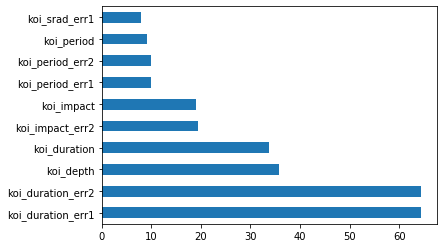

In [59]:
# Select features
# plot the 10 largest coeficients for estimation of the three classes in targe 
pd.Series(abs(grid.best_estimator_.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

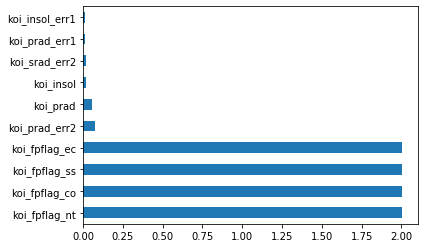

In [60]:
pd.Series(abs(grid.best_estimator_.coef_[1]), index=X.columns).nlargest(10).plot(kind='barh')

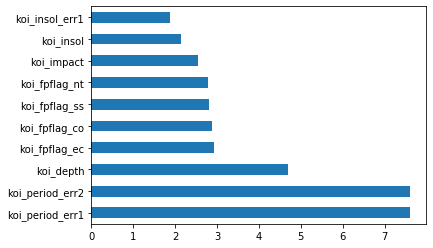

In [61]:
pd.Series(abs(grid.best_estimator_.coef_[2]), index=X.columns).nlargest(10).plot(kind='barh')

In [73]:
#  Select the features that are included in the three classes
selected_newfeatures =["koi_period_err1", "koi_period_err2", "koi_depth",
"koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_duration", "koi_impact","koi_impact_err2"]
X_new= X [selected_newfeatures]

In [74]:
# Create a Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, target, random_state=580580, stratify = target)

In [75]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [76]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [85]:
# Hyperparameter Tuning¶
# Use GridSearchCV to tune the model's parameters
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [86]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [ 100,500],
              'gamma': [0.000001, 0.000005, 0.000001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [87]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters

grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=100, gamma=1e-06 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. C=100, gamma=1e-06, score=0.893, total=   1.0s
[CV] C=100, gamma=1e-06 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................. C=100, gamma=1e-06, score=0.875, total=   1.1s
[CV] C=100, gamma=1e-06 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] .................. C=100, gamma=1e-06, score=0.884, total=   1.3s
[CV] C=100, gamma=1e-06 ..............................................
[CV] .................. C=100, gamma=1e-06, score=0.865, total=   1.0s
[CV] C=100, gamma=1e-06 ..............................................
[CV] .................. C=100, gamma=1e-06, score=0.887, total=   1.1s
[CV] C=100, gamma=5e-06 ..............................................
[CV] .................. C=100, gamma=5e-06, score=0.893, total=   1.1s
[CV] C=100, gamma=5e-06 ..............................................
[CV] .................. C=100, gamma=5e-06, score=0.875, total=   1.1s
[CV] C=100, gamma=5e-06 ..............................................
[CV] .................. C=100, gamma=5e-06, score=0.884, total=   1.4s
[CV] C=100, gamma=5e-06 ..............................................
[CV] .................. C=100, gamma=5e-06, score=0.865, total=   1.2s
[CV] C=100, gamma=5e-06 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 500], 'gamma': [1e-06, 5e-06, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [88]:
# List the best parameters for this dataset
print(grid.best_params_)


{'C': 500, 'gamma': 1e-06}


In [90]:
# List the best score
AcuracySVGnew = grid.best_score_
print(grid.best_score_)

0.88384193597683


# model did NOT gain acuracy by tuning parameters or using "rbf"

# Createa Deep Learning Model

In [72]:
# Pre-processing¶
# Scale the data using the MinMaxScaler 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [73]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [74]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [76]:
# Create model and add layers
deep_model = Sequential()
deep_model.add(Dense(units=100, activation='relu', input_dim=40))
deep_model.add(Dense(units=100, activation='relu'))
deep_model.add(Dense(units=3, activation='softmax'))

In [77]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
deep_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               4100      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 303       
Total params: 14,503
Trainable params: 14,503
Non-trainable params: 0
_________________________________________________________________


In [79]:
# train the Model

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 5243 samples
Epoch 1/100
5243/5243 - 0s - loss: 0.5975 - accuracy: 0.7030
Epoch 2/100
5243/5243 - 0s - loss: 0.3723 - accuracy: 0.8081
Epoch 3/100
5243/5243 - 0s - loss: 0.3563 - accuracy: 0.8152
Epoch 4/100
5243/5243 - 0s - loss: 0.3492 - accuracy: 0.8173
Epoch 5/100
5243/5243 - 0s - loss: 0.3394 - accuracy: 0.8304
Epoch 6/100
5243/5243 - 0s - loss: 0.3328 - accuracy: 0.8402
Epoch 7/100
5243/5243 - 0s - loss: 0.3324 - accuracy: 0.8358
Epoch 8/100
5243/5243 - 0s - loss: 0.3250 - accuracy: 0.8449
Epoch 9/100
5243/5243 - 0s - loss: 0.3233 - accuracy: 0.8442
Epoch 10/100
5243/5243 - 0s - loss: 0.3199 - accuracy: 0.8463
Epoch 11/100
5243/5243 - 0s - loss: 0.3099 - accuracy: 0.8528
Epoch 12/100
5243/5243 - 0s - loss: 0.3081 - accuracy: 0.8573
Epoch 13/100
5243/5243 - 0s - loss: 0.3111 - accuracy: 0.8520
Epoch 14/100
5243/5243 - 0s - loss: 0.3028 - accuracy: 0.8629
Epoch 15/100
5243/5243 - 0s - loss: 0.2983 - accuracy: 0.8688
Epoch 16/100
5243/5243 - 0s - loss: 0.3029 - accuracy: 0.

In [80]:
# Predictions are made after saving and loading the model
# Evaluate the model using the testing data
# model_loss, model_accuracy = deep_model.evaluate(
#     X_test_scaled, y_test_categorical, verbose=2)

# Save the Model

In [87]:
# save the model
deep_model.save('DeepLearningMarina.h5')


In [88]:
# Load the model
from tensorflow.keras.models import load_model

loaded_deep_model= load_model(filenamedl)

model_loss, model_accuracy = loaded_deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

1748/1748 - 0s - loss: 0.2402 - accuracy: 0.9056


# Both give similar accuracy, DL seems easier to apply to the data and it does not require feature selection